### **MODULE 4: Salary Analysis **

**Pandas Concepts:**

- `.groupby()` with statistical functions
- `.agg()` with custom functions
- `.quantile()` for percentile analysis
- `.filter()` for conditional groups
- Statistical operations: `.mean()`, `.median()`, `.std()`

In [11]:
import pandas as pd
df = pd.read_csv("data_jobs")
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"], errors="coerce")

#### Salaries by jobs role

Text(0, 0.5, '')

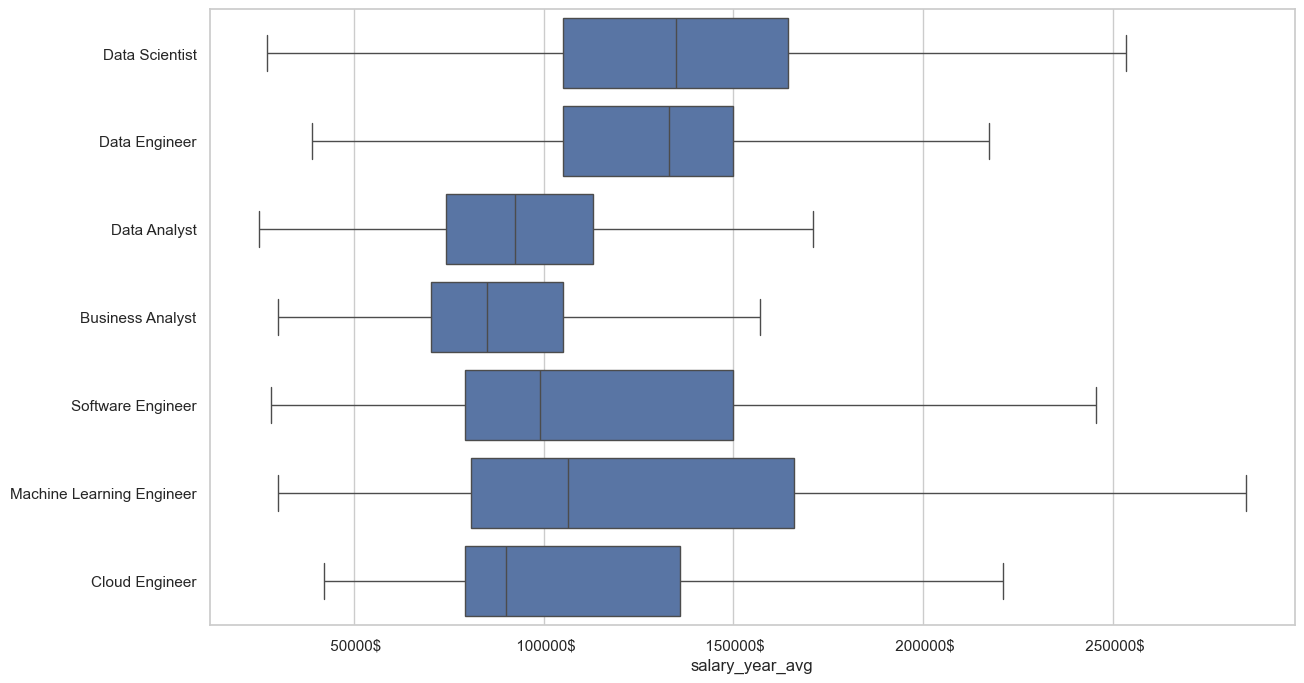

In [9]:
df.groupby("job_title_short")["salary_year_avg"].agg(
    count="count",
    mean="mean",
    median="median",
    std="std",
    min="min",
    max="max",
    q25=lambda x: x.quantile(0.25),
    q75=lambda x: x.quantile(0.75)
)

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['salary_year_avg'], y=df['job_title_short'], showfliers=False)
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='x')
ax.xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}$'.replace(',', " ")))
plt.ylabel("")

#### Power of money compare to acerage salary in each country

Text(0.5, 0, 'Real power of money ')

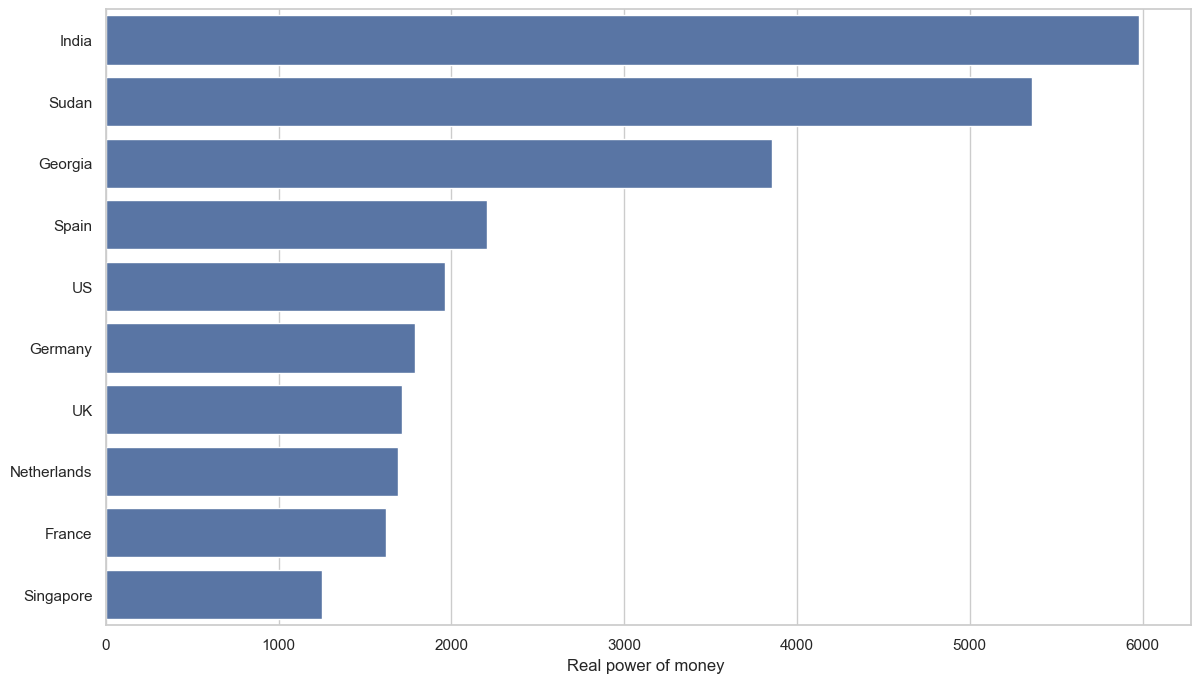

In [24]:
most_jobs_posted_companies_indexes = df.groupby("job_location").size().sort_values(ascending=False).head(10).index
cost_of_living_stats = df.groupby("job_location")['salary_year_avg'].agg("mean")[most_jobs_posted_companies_indexes].to_frame("salary_year_avg")
 
data = {
    'Singapore': 85.3,
    'Netherlands': 68.1,
    'US': 64.8,
    'Germany': 64.7,
    'France': 64.4,
    'UK': 64.2,
    'Spain': 48.6,
    'Georgia': 31.2,
    'India': 19.0,
    'Sudan': 25  
}

cost_of_living_index = pd.Series(data, name='col_index')
cost_of_living_stats['col_index'] = cost_of_living_index
cost_of_living_stats['ppp'] = cost_of_living_stats['salary_year_avg'] / cost_of_living_stats['col_index']

cost_of_living_stats.sort_values('ppp', inplace=True, ascending=False)
sns.barplot(x=cost_of_living_stats['ppp'], y=cost_of_living_stats.index)
plt.ylabel("")
plt.xlabel("Real power of money ")


In [36]:
df[df['job_location'] == 'India']['salary_year_avg'].mean()

np.float64(113602.18213058419)

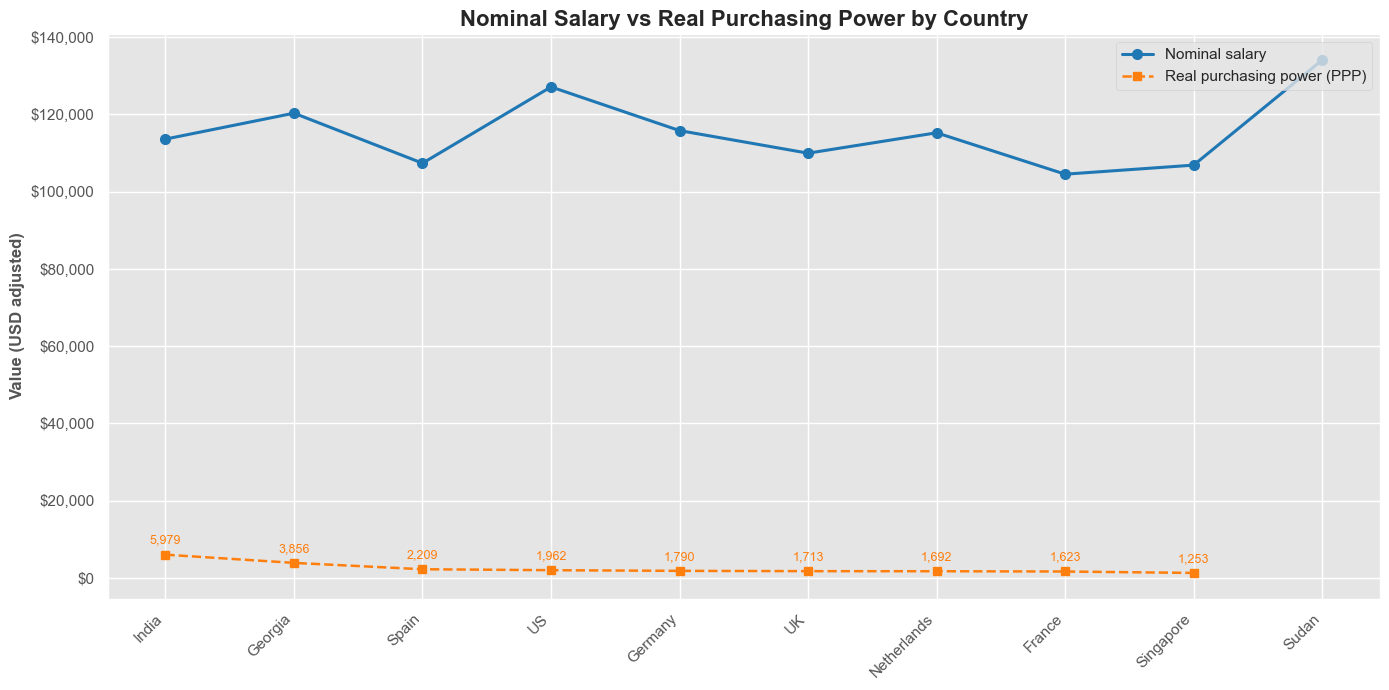

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

plt.style.use("ggplot")


viz_df = cost_of_living_stats.reset_index()
viz_df = viz_df.sort_values("ppp", ascending=False).reset_index(drop=True)

x = np.arange(len(viz_df))

nominal_color = "#1f77b4"
ppp_color = "#ff7f0e"

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(
    x,
    viz_df["salary_year_avg"],
    marker="o",
    linewidth=2.2,
    markersize=7,
    label="Nominal salary",
    color=nominal_color,
    zorder=3
)

ax.plot(
    x,
    viz_df["ppp"],
    marker="s",
    linestyle="--",
    linewidth=1.8,
    markersize=6,
    label="Real purchasing power (PPP)",
    color=ppp_color,
    zorder=4
)

ax.yaxis.set_major_formatter(FuncFormatter(lambda v, p: f"${v:,.0f}"))

ax.set_ylabel("Value (USD adjusted)", fontsize=12, fontweight="bold")
ax.set_title(
    "Nominal Salary vs Real Purchasing Power by Country",
    fontsize=16,
    weight="semibold"
)

ax.set_xticks(x)
ax.set_xticklabels(viz_df["job_location"], rotation=45, ha="right", fontsize=11)

ax.legend(loc="upper right", frameon=True)

for xi, ppp_val in zip(x, viz_df["ppp"]):
    ax.annotate(
        f"{ppp_val:,.0f}",
        (xi, ppp_val),
        textcoords="offset points",
        xytext=(0, 8),
        ha="center",
        fontsize=9,
        color=ppp_color
    )

plt.tight_layout()
plt.show() 

#### Salary changes over months (time series)

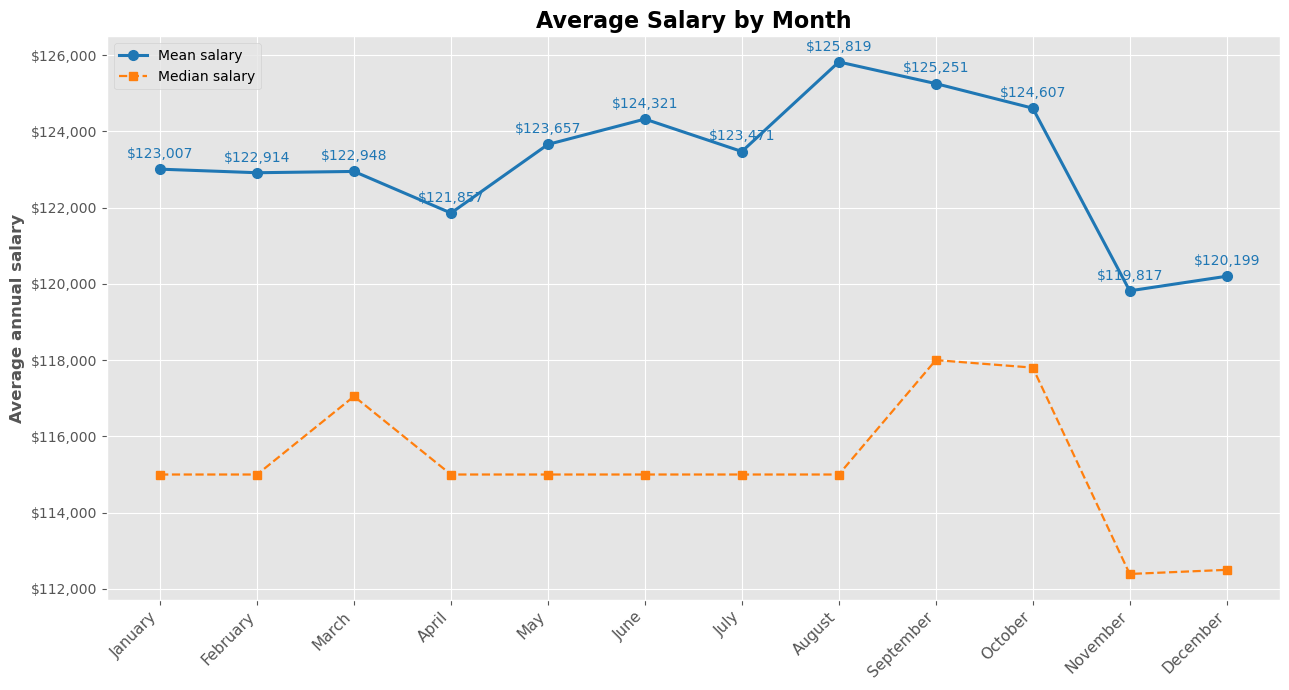

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
from matplotlib.ticker import FuncFormatter

plt.style.use("ggplot")

salary_stats = df.groupby("Month_Name")["salary_year_avg"].agg(
    mean="mean",
    median="median",
).reset_index()

month_order = list(calendar.month_name)[1:]  
salary_stats["Month_Name"] = pd.Categorical(
    salary_stats["Month_Name"], categories=month_order, ordered=True
)
salary_stats = salary_stats.sort_values("Month_Name").dropna(subset=["Month_Name"]).reset_index(drop=True)

x = np.arange(len(salary_stats))

mean_color = "#1f77b4"
median_color = "#ff7f0e"

fig, ax = plt.subplots(figsize=(13, 7))

ax.plot(x, salary_stats["mean"], linestyle="-", marker="o", color=mean_color,
        linewidth=2.2, markersize=7, label="Mean salary", zorder=3)

ax.plot(x, salary_stats["median"], linestyle="--", marker="s", color=median_color,
        linewidth=1.6, markersize=6, label="Median salary", zorder=4)

ax.yaxis.set_major_formatter(FuncFormatter(lambda val, pos: f'${val:,.0f}'))

ax.set_ylabel("Average annual salary", fontsize=12, fontweight='bold')
ax.set_title("Average Salary by Month", fontsize=16, weight="semibold")

ax.set_xticks(x)
ax.set_xticklabels(salary_stats["Month_Name"].astype(str), rotation=45, ha="right", fontsize=11)

ax.legend(loc="upper left", frameon=True)

for xi, mean_val in zip(x, salary_stats["mean"]):
    ax.annotate(f'${mean_val:,.0f}',
                (xi, mean_val),
                textcoords="offset points",
                xytext=(0, 8),
                ha="center",
                fontsize=10,
                color=mean_color)

plt.tight_layout()
plt.show()

#### Remote vs On-site 

99

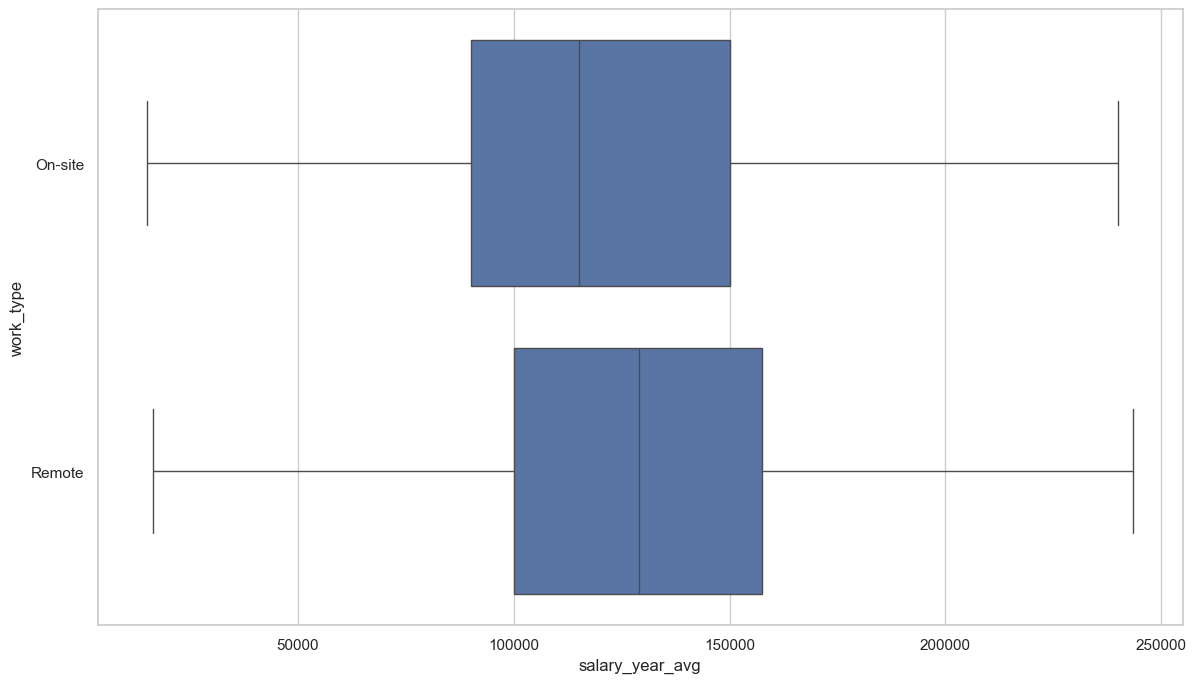

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import gridspec
import seaborn as sns

df['work_type'] = df['job_work_from_home'].apply(lambda isRemote: 'Remote' if isRemote else 'On-site')

sns.boxplot(x= df['salary_year_avg'], y = df['work_type'], showfliers=False)
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='x')

#### Salaries by grades


/var/folders/3h/b50xl5913dl0kqp7zbychznr0000gn/T/ipykernel_3621/4025124285.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_parts = ax.boxplot(


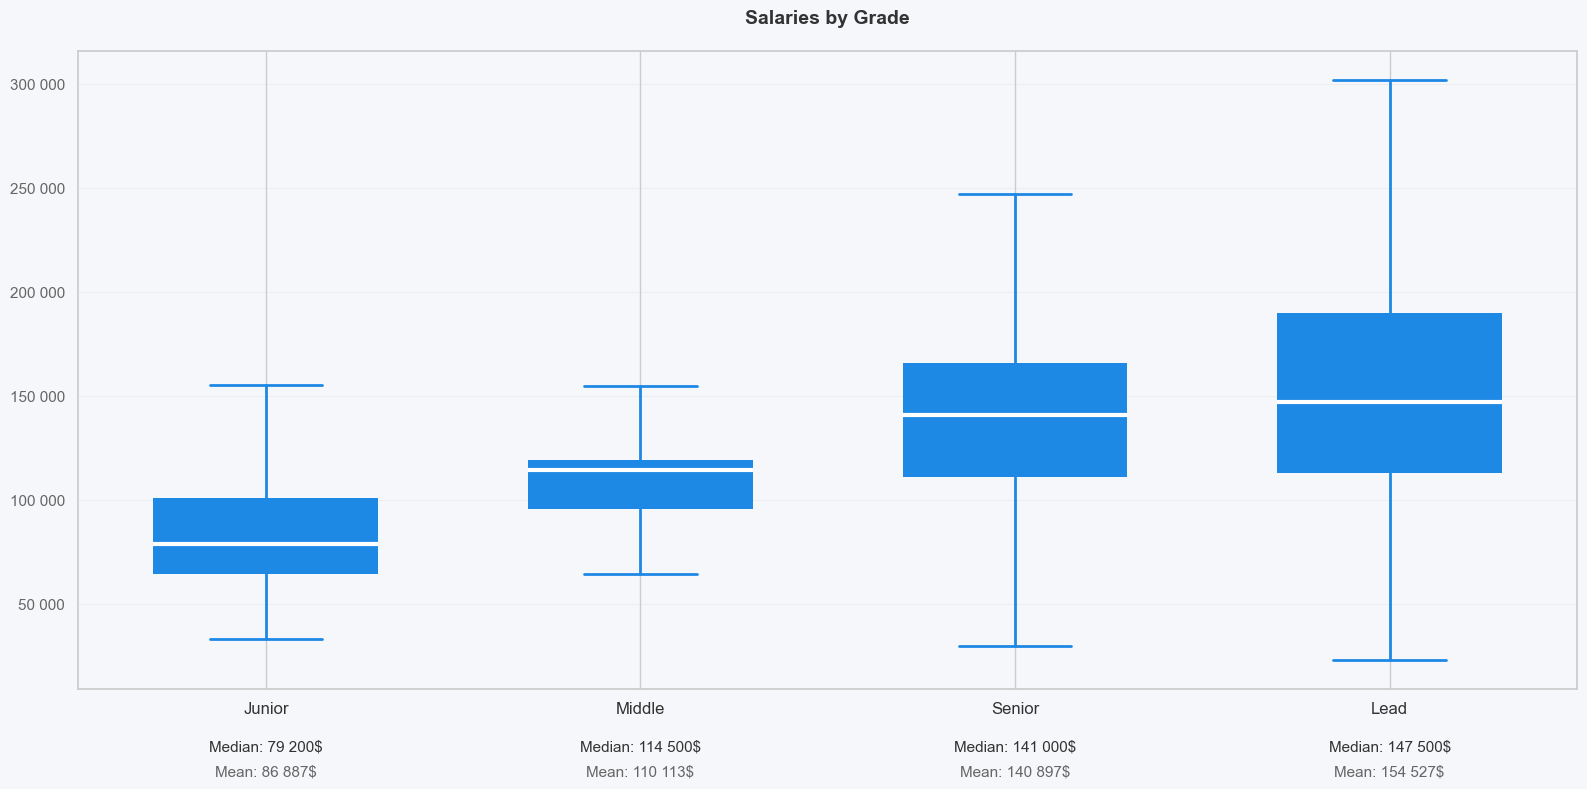

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

lead_title = ('Leadership', 'Manager', 'Director', 'Head', 'Chief', 'C-Level', 'Lead')
middle_titles = ('Mid-Level', 'Mid level', 'Midlevel', 'Mid', 'Intermediate', "Middle", 'Mid Sr.', 'Mid-Sr.', 'Mid Sr', 'Mid-Sr')
junior_titles = ('Junior', 'Jr.', 'Entry', 'Intern', 'Trainee', 'Associate')
senior_titles = ('Senior', 'Sr.', 'Sr', 'Expert', 'Principal', 'Staff', 'Advanced')

grades = {
    lead_title: 'Lead',
    middle_titles: 'Middle',
    junior_titles: 'Junior',
    senior_titles: 'Senior'
}

def extract_grade(title):
    if pd.isna(title):
        return 'Other'
    title_lower = title.lower()
    for keywords, grade in grades.items():
        if any(keyword.lower() in title_lower for keyword in keywords):
            return grade
    return 'Other'
df['Grade'] = df['job_title'].apply(extract_grade)

fig, ax = plt.subplots(figsize=(16, 8))
grade_order = ["Junior", "Middle", "Senior", "Lead"]

df.dropna(subset=['salary_year_avg'], inplace=True)
box_parts = ax.boxplot(
    [df[df['Grade'] == grade]['salary_year_avg'].values 
     for grade in grade_order],
    labels=grade_order,
    widths=0.6,
    patch_artist=True,
    showmeans=False,
    showfliers=False,
    boxprops=dict(facecolor='#1e88e5', color='#1e88e5', linewidth=0),
    whiskerprops=dict(color='#1e88e5', linewidth=2),
    capprops=dict(color='#1e88e5', linewidth=2),
    medianprops=dict(color='white', linewidth=3),
    flierprops=dict(marker='o', markerfacecolor='#1e88e5', markersize=6, 
                    markeredgecolor='#1e88e5', linestyle='none')
)

for i, grade in enumerate(grade_order):
    grade_data = df[df['Grade'] == grade]['salary_year_avg']
    median_val = grade_data.median()
    mean_val = grade_data.mean()
    
    x_pos = i + 1
    y_pos = ax.get_ylim()[0] - (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.08
    
    ax.text(x_pos, y_pos, f'Median: {median_val:,.0f}$'.replace(',', ' '),
            ha='center', va='top', fontsize=11, color='#333')
    ax.text(x_pos, y_pos - (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.04,
            f'Mean: {mean_val:,.0f}$'.replace(',', ' '),
            ha='center', va='top', fontsize=11, color='#666')

ax.set_xlabel('')
ax.tick_params(axis='y', labelsize=11, colors='#666')
ax.tick_params(axis='x', labelsize=12, colors='#333')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'.replace(',', ' ')))
ax.set_facecolor('#f5f7fa')
fig.patch.set_facecolor('#f5f7fa')
ax.grid(True, axis='y', alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.title('Salaries by Grade', fontsize=14, fontweight='bold', color='#333', pad=20)
plt.tight_layout()
plt.show()
